In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/GiveMeSomeCredit/Data Dictionary.xls
/kaggle/input/GiveMeSomeCredit/cs-training.csv
/kaggle/input/GiveMeSomeCredit/sampleEntry.csv
/kaggle/input/GiveMeSomeCredit/cs-test.csv


In [2]:
df = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-training.csv', index_col='Unnamed: 0')

In [3]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [4]:
!pip install xgboost

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from catboost import CatBoostClassifier
from xgboost import XGBClassifier
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

In [6]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [7]:
df.isnull().sum()

SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

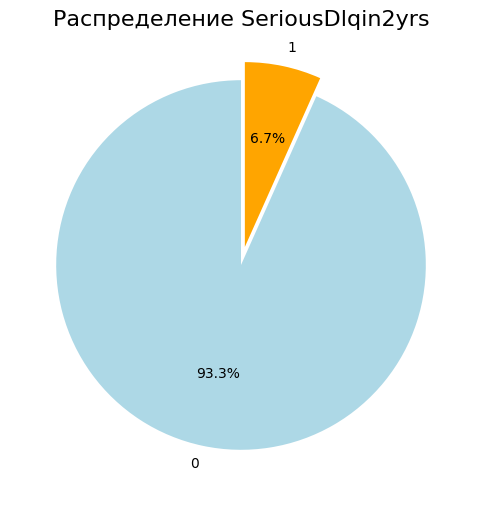

In [8]:
# Подсчет значений в столбце SeriousDlqin2yrs
value_counts = df['SeriousDlqin2yrs'].value_counts()

# Создание круговой диаграммы
plt.figure(figsize=(6, 6))  # Размер графика
plt.pie(value_counts, 
        labels=value_counts.index, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['lightblue', 'orange'], 
        explode=(0, 0.1))  # Выделяем сектор "1" для лучшей видимости

# Добавление заголовка
plt.title('Распределение SeriousDlqin2yrs', fontsize=16)

# Отображение диаграммы
plt.show()

In [9]:
from scipy import stats

numeric_columns = ['RevolvingUtilizationOfUnsecuredLines', 'DebtRatio', 'NumberOfOpenCreditLinesAndLoans']

# Вычисление Z-оценок
z_scores = np.abs(stats.zscore(df[numeric_columns]))

# Определение порога для Z-оценки
threshold = 3

# Удаление строк с выбросами
mask = (z_scores < threshold).all(axis=1)
df = df[mask]

In [10]:
df

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...
149996,0,0.040674,74,0,0.225131,2100.0,4,0,1,0,0.0
149997,0,0.299745,44,0,0.716562,5584.0,4,0,1,0,2.0
149998,0,0.246044,58,0,3870.000000,NaN,18,0,1,0,0.0
149999,0,0.000000,30,0,0.000000,5716.0,4,0,0,0,0.0


In [11]:
for i in df['age'].unique():
  df.loc[(df['age'] == i) & (df['MonthlyIncome'].isna()), 'MonthlyIncome'] = df.loc[(df['age'] == i), 'MonthlyIncome'].median()

In [12]:
for i in df['age'].unique():
  df.loc[(df['age'] == i) & (df['NumberOfDependents'].isna()), 'NumberOfDependents'] = df.loc[(df['age'] == i), 'NumberOfDependents'].median()

In [13]:
df.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           4
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      3
dtype: int64

In [14]:
median_value = df['MonthlyIncome'].median()  # Вычисление медианы
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(median_value)

median_value = df['NumberOfDependents'].median()  # Вычисление медианы
df['NumberOfDependents'] = df['NumberOfDependents'].fillna(median_value)

In [15]:
df = df.dropna()

In [16]:
df.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
1,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
2,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
3,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
4,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
5,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [17]:
df.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.428782e+03,8.452760,0.265973,1.018240,0.240387,0.742560
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.289798e+04,5.145951,4.169304,1.129771,4.155179,1.105905
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.773000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.584000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


In [18]:
train = df

In [19]:
y = train["SeriousDlqin2yrs"]
X = train.drop(["SeriousDlqin2yrs"], axis=1)

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42, stratify=y)

In [21]:
# from imblearn.over_sampling import SMOTE
# from sklearn.datasets import make_classification
# from collections import Counter

# print("До SMOTE:", Counter(y))  # Вывод распределения классов

# # Применение SMOTE
# smote = SMOTE(random_state=42, sampling_strategy=0.08)
# X, y = smote.fit_resample(X, y)

# print("После SMOTE:", Counter(y))

In [22]:
xgb_model = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='mlogloss')
cat_model = CatBoostClassifier(random_state=42, eval_metric='Logloss')

# Определение сетки гиперпараметров для поиска
param_grid = {
    'n_estimators': [20, 25, 30, 35, 40, 45, 50, 60, 65, 70, 75, 80, 90, 100],  # Количество деревьев
    # 'learning_rate': [0.1, 0.12],  # Шаг обучения
    'max_depth': [6],  # Максимальная глубина дерева
    # 'subsample': [0.6, 0.8],  # Доля выборки для каждого дерева
    # 'colsample_bytree': [0.85]  # Доля признаков для каждого дерева
}

NameError: name 'CatBoostClassifier' is not defined

In [23]:
from sklearn.model_selection import GridSearchCV

# Инициализация GridSearchCV
grid_search = GridSearchCV(
    estimator=xgb_model,
    param_grid=param_grid,
    scoring='roc_auc',  # Метрика для оценки
    cv=5,  # Количество фолдов кросс-валидации
    verbose=1,  # Вывод информации о процессе
    n_jobs=-1  # Использование всех доступных ядер
)

NameError: name 'param_grid' is not defined

In [24]:
# Поиск оптимальных параметров
grid_search.fit(X, y)

# Лучшие параметры
print("Лучшие параметры:", grid_search.best_params_)
print("Лучшая точность на валидации:", grid_search.best_score_)

# Оценка модели на тестовых данных
best_model = grid_search.best_estimator_

In [76]:
best_model = XGBClassifier(colsample_bytree=0.6, learning_rate=0.03, max_depth=5, 
                           n_estimators=373, subsample=0.5, gamma=0.2, scale_pos_weight=5)

best_model.fit(X, y)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.6, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.2, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.03, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=373, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [77]:
# best_model = CatBoostClassifier(learning_rate=0.1, max_depth=6, 
#                            n_estimators=80, subsample=0.6, scale_pos_weight=5)
# best_model.fit(X, y)

In [78]:
# from sklearn.ensemble import StackingClassifier, RandomForestClassifier
# from sklearn.linear_model import LogisticRegression

# base_models = [
#     ('xgb1', XGBClassifier(colsample_bytree=0.85, learning_rate=0.11, max_depth=5, 
#                            n_estimators=80, subsample=0.8, gamma=0.2, scale_pos_weight=5)),
#     ('xgb2', XGBClassifier(colsample_bytree=0.8, learning_rate=0.1, max_depth=6, 
#                            n_estimators=70, subsample=0.8, gamma=0.2, scale_pos_weight=5)),
#     # ('xgb3', XGBClassifier())
# ]
# best_model = StackingClassifier(estimators=base_models, final_estimator=XGBClassifier())
# best_model.fit(X, y)

In [79]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score 
from sklearn.metrics import f1_score

**XGBoost**

In [80]:
y_pred = best_model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
pr = precision_score(y_test, y_pred)
re = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
print(f"Accuracy: {acc:.2f}")
print(f"Precision: {pr:.2f}")
print(f"Recall: {re:.2f}")
print(f"F1: {f1:.2f}")

Accuracy: 0.91
Precision: 0.39
Recall: 0.58
F1: 0.46


In [81]:
from sklearn.metrics import roc_auc_score, roc_curve

XGBoost

In [82]:
y_pred_proba = best_model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print('ROC AUC:', auc_score)

ROC AUC: 0.886421930180025


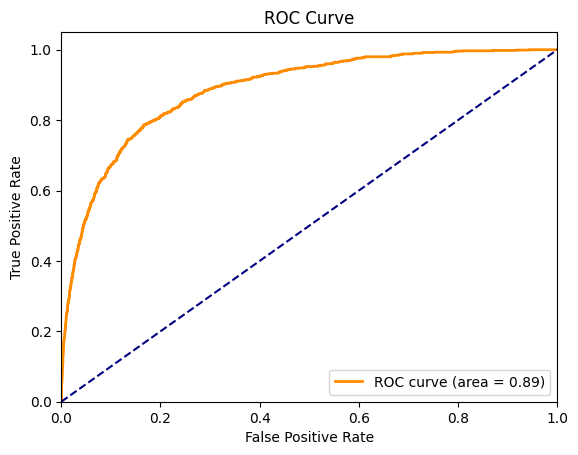

In [83]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % auc_score)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

In [84]:
# Лучшие параметры: {'colsample_bytree': 1.0, 'learning_rate': 0.05, 'max_depth': 5, 
# 'n_estimators': 100, 'subsample': 0.8}
# Рок-Аук = ROC AUC: 0.8681369179302147

In [85]:
test = pd.read_csv('/kaggle/input/GiveMeSomeCredit/cs-test.csv')

In [86]:
test

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,NaN,0.885519,43,0,0.177513,5700.0,4,0,0,0,0.0
1,2,NaN,0.463295,57,0,0.527237,9141.0,15,0,4,0,2.0
2,3,NaN,0.043275,59,0,0.687648,5083.0,12,0,1,0,2.0
3,4,NaN,0.280308,38,1,0.925961,3200.0,7,0,2,0,0.0
4,5,NaN,1.000000,27,0,0.019917,3865.0,4,0,0,0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
101498,101499,NaN,0.282653,24,0,0.068522,1400.0,5,0,0,0,0.0
101499,101500,NaN,0.922156,36,3,0.934217,7615.0,8,0,2,0,4.0
101500,101501,NaN,0.081596,70,0,836.000000,NaN,3,0,0,0,NaN
101501,101502,NaN,0.335457,56,0,3568.000000,NaN,8,0,2,1,3.0


In [87]:
X_test_test = test.drop(["SeriousDlqin2yrs", "Unnamed: 0"], axis=1)
test_ids = test["Unnamed: 0"]

In [88]:
X_test_test.isnull().sum()

RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           20103
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       2626
dtype: int64

In [89]:
for i in X_test_test['age'].unique():
  X_test_test.loc[(X_test_test['age'] == i) & (X_test_test['MonthlyIncome'].isna()), 'MonthlyIncome'] = X_test_test.loc[(X_test_test['age'] == i), 'MonthlyIncome'].median()

In [90]:
for i in X_test_test['age'].unique():
  X_test_test.loc[(X_test_test['age'] == i) & (X_test_test['NumberOfDependents'].isna()), 'NumberOfDependents'] = X_test_test.loc[(X_test_test['age'] == i), 'NumberOfDependents'].median()

In [91]:
median_value = X_test_test['MonthlyIncome'].median()  # Вычисление медианы
X_test_test['MonthlyIncome'] = X_test_test['MonthlyIncome'].fillna(median_value)

In [92]:
test_predictions = best_model.predict_proba(X_test_test)[:, 1]

submission = pd.DataFrame({"Id": test_ids, "Probability": test_predictions})

submission.to_csv("submission.csv", index=False)